<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv")
df = df.select_dtypes('number')

In [3]:
df.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


# Завдання 1
Виведіть основні числові характеристики та кількість пропущених значень по стовпчиках

In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.isnull().sum()

age         0
bmi         0
children    0
expenses    0
dtype: int64

# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [6]:
from sklearn.model_selection import train_test_split

x = df.drop(["age", "children", "expenses"], axis="columns")
y = df["expenses"]


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 9771.908799580146
RMSE: 12559.738677185884
R2: 0.022652133597733215


# Завдання 4
Напишіть рівняння регресії за прикладом:
Ціна = 1.02*Температура - 15.6

In [16]:
equation = "Expenses = "
for i, col in enumerate(x.columns):
    equation += f"{model.coef_[i]:.2f}*{col} + "
equation += f"{model.intercept_:.2f}"

print(equation)

Expenses = 405.04*bmi + 693.67


# Завдання 5 (оптимально)
Перевірте як видалення викидів вплине на результат

<Axes: >

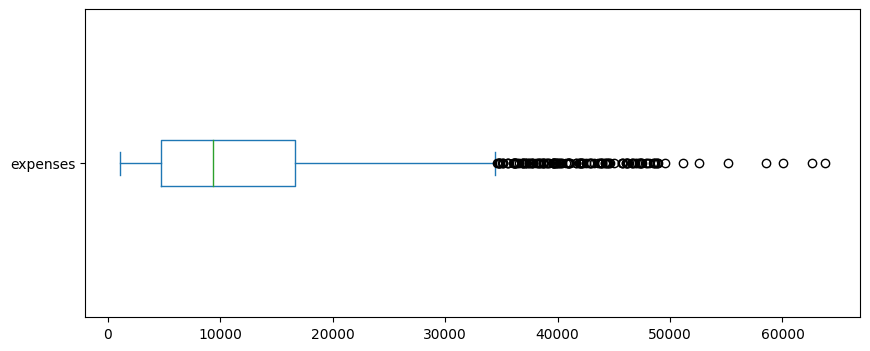

In [17]:
df['expenses'].plot(kind='box', vert=False, figsize=(10,4))

MAE без викидів: 4462.956910155194
RMSE без викидів: 6262.591230091566
R2 без викидів: 0.22484600754554396


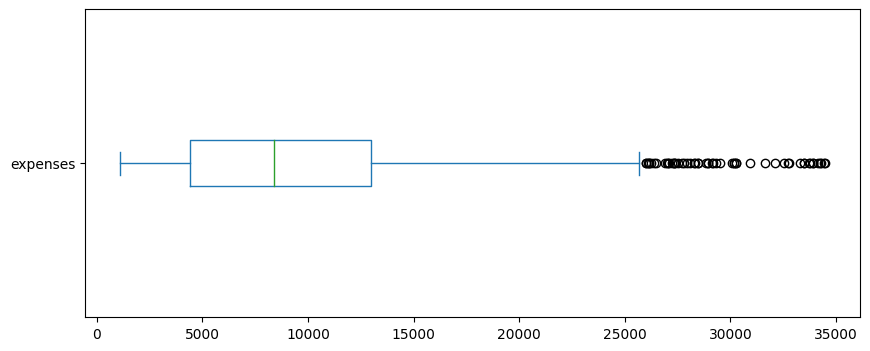

In [21]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    mask = (df >= (Q1 - 1.5 * IQR)) & (df <= (Q3 + 1.5 * IQR))
    return df[mask]

new_data = remove_outliers(df).dropna()

X = new_data.drop(["expenses"], axis="columns")
y = new_data["expenses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE без викидів: {mae}")
print(f"RMSE без викидів: {rmse}")
print(f"R2 без викидів: {r2}")

new_data['expenses'].plot(kind='box', vert=False, figsize=(10, 4))
plt.show()